In [1]:
import pandas as pd


In [118]:
fields=['Name','category','hostler','high_school','intermediate','B_tech','sem_1_marks', 'sem_1_attendance', 'sem_2_marks',
       'sem_2_attendance', 'sem_3_marks', 'sem_3_attendance', 'sem_4_marks',
       'sem_4_attendance', 'sem_5_marks', 'sem_5_attendance', 'sem_6_marks',
       'sem_6_attendance', 'sem_7_marks', 'sem_7_attendance']
new=pd.read_csv('student_data_cs_4.csv',skipinitialspace=True, usecols=fields)

In [119]:
new.columns

Index(['Name', 'category', 'hostler', 'high_school', 'intermediate', 'B_tech',
       'sem_1_marks', 'sem_1_attendance', 'sem_2_marks', 'sem_2_attendance',
       'sem_3_marks', 'sem_3_attendance', 'sem_4_marks', 'sem_4_attendance',
       'sem_5_marks', 'sem_5_attendance', 'sem_6_marks', 'sem_6_attendance',
       'sem_7_marks', 'sem_7_attendance'],
      dtype='object')

In [120]:
import numpy as np
def myfunction(string):
    try:
        return float(string)
    except:
        return np.nan
new.sem_6_marks=new.sem_6_marks.apply(myfunction)

        

In [162]:
new.dropna(subset = ['sem_6_marks'],inplace=True)
X=np.array(new.sem_1_attendance)


In [189]:
def myfunction(string):
    if string=='GENERAL':
        return 1
    elif string=='OBC':
        return 2
    elif string=='YES':
        return 1
    elif string=='NO':
        return 2
    else:
        return 3
# new.hostler=new.hostler.apply(myfunction)
y=new.sem_1_marks.as_matrix(columns=None)

In [164]:
from sklearn.neighbors import KNeighborsClassifier

In [171]:
knn=KNeighborsClassifier(n_neighbors=2)

In [190]:
X=X.reshape(-1,1)

In [191]:
X.shape
y=y.reshape(-1,1)

In [174]:
knn.fit(X,y)

C:\Users\acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [180]:
knn.predict([[]])

array(['GENERAL'], dtype=object)

In [181]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [182]:
logreg.fit(X,y)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [187]:
logreg.predict([[40]])

array(['GENERAL'], dtype=object)

In [275]:
from sklearn.linear_model import LinearRegression
liner=LinearRegression()

In [276]:
new=new.dropna(subset=['sem_5_marks'])
X=np.array(new.sem_5_marks)
X=X.reshape(-1,1)
X=np.append(X,np.array(new.sem_3_marks).reshape(-1,1),axis=1)
y=new.sem_6_marks.as_matrix(columns=None).reshape(-1,1)

liner.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [282]:
from sklearn import metrics
print(metrics.accuracy_score(y,liner.predict(X)))


array([[67.9 , 75.2 ],
       [61.11, 70.7 ],
       [76.6 , 86.9 ],
       [69.4 , 79.7 ],
       [78.1 , 83.2 ],
       [78.7 , 81.8 ],
       [72.6 , 63.1 ],
       [74.3 , 78.2 ],
       [62.9 , 67.8 ],
       [68.2 , 68.7 ],
       [71.4 , 65.4 ],
       [75.7 , 74.7 ],
       [54.3 , 59.5 ],
       [85.1 , 79.6 ],
       [79.  , 88.  ],
       [84.5 , 91.  ],
       [69.7 , 73.41],
       [75.8 , 74.9 ],
       [64.2 , 68.2 ],
       [65.1 , 71.4 ],
       [61.1 , 67.  ],
       [72.5 , 73.5 ],
       [67.7 , 68.6 ],
       [76.1 , 72.5 ],
       [64.  , 71.2 ],
       [64.7 , 79.9 ],
       [67.6 , 70.9 ],
       [75.5 , 69.1 ],
       [64.6 , 71.7 ],
       [64.8 , 65.8 ],
       [65.5 , 62.2 ],
       [81.9 , 82.4 ],
       [62.7 , 67.5 ],
       [74.5 , 69.5 ],
       [78.8 , 82.2 ],
       [59.6 , 71.1 ],
       [73.4 , 82.9 ],
       [57.6 , 62.3 ],
       [82.6 , 92.  ],
       [71.59, 78.18],
       [71.8 , 70.3 ],
       [70.5 , 66.6 ],
       [63.1 , 62.1 ],
       [59.

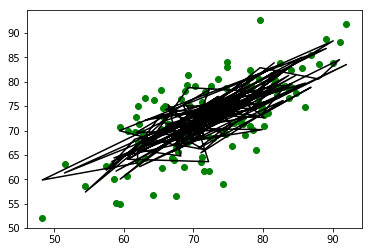

In [249]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(X[:,1], y,color='g')
plt.plot(X[:,1], liner.predict(X),color='k')

plt.show()

In [283]:
import seaborn as sns

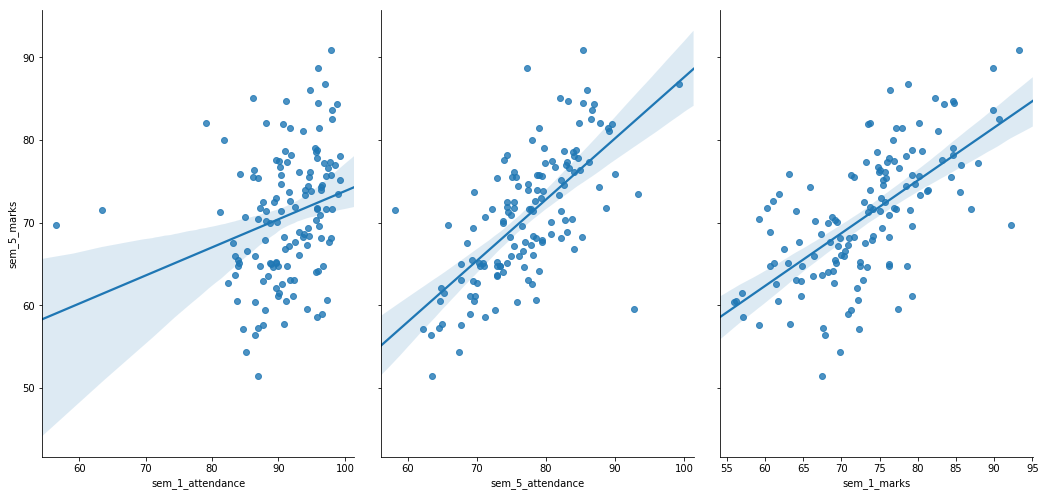

In [290]:
sns.pairplot(new,x_vars=['sem_1_attendance','sem_5_attendance','sem_1_marks'],y_vars=['sem_5_marks'],size=7,aspect=0.7,kind='reg')

In [387]:
feature_columns=['sem_3_marks','sem_5_attendance','sem_1_marks','intermediate','sem_4_marks',]
X=new[feature_columns]
y=new['sem_5_marks']

In [388]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [389]:
X_train.shape
X_test.shape

(34, 5)

In [390]:
from sklearn.linear_model import LinearRegression
liner=LinearRegression()
liner.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [391]:
liner.intercept_
liner.coef_

array([-0.08309911,  0.32335566,  0.35442454,  0.04170218,  0.51067082])

In [392]:
y_predict=liner.predict(X_test)

In [393]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))

4.204963292040751